In [2]:
import networkx as nx
import numpy as np
import copy
import random
import time
import itertools

#Plotting
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

#systems
from ANCR_v2 import *

In [4]:
def score_length(draw):
    """
    Scores the length of the systems
    In: draw=system, {sys: {logical edge: walk}}
    Out: score=total number of edges in each system
    """
    length=0.0
    for sys in draw:
        sys_edges=set()
        for e in draw[sys]:
            sys_edges.update(draw[sys][e])
        length+=len(sys_edges)
    return length

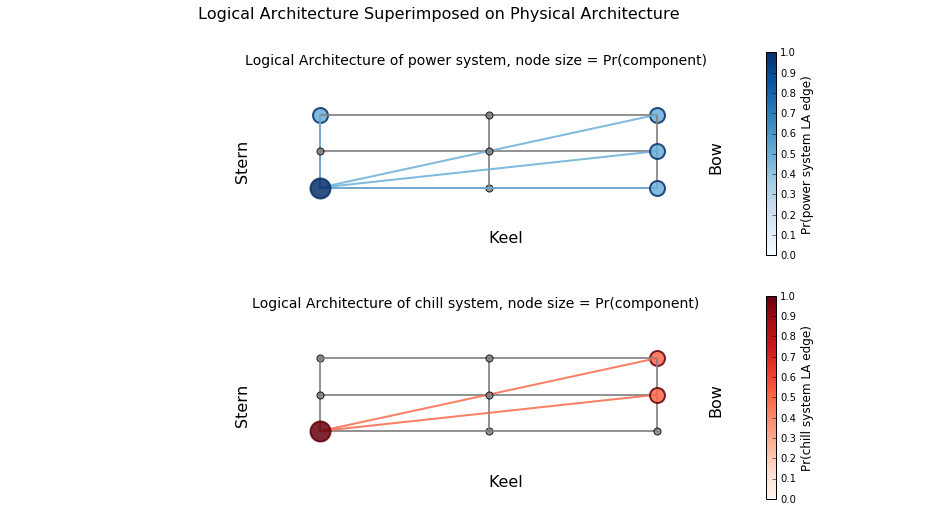

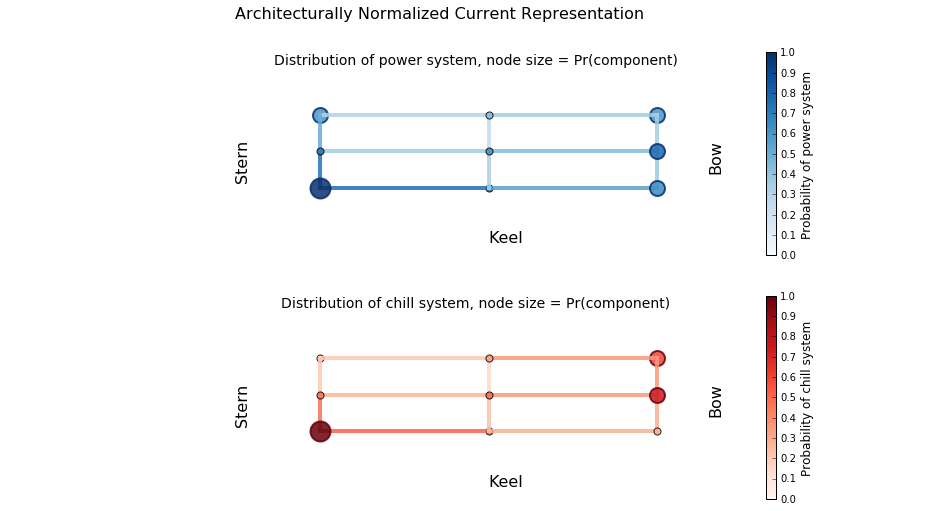

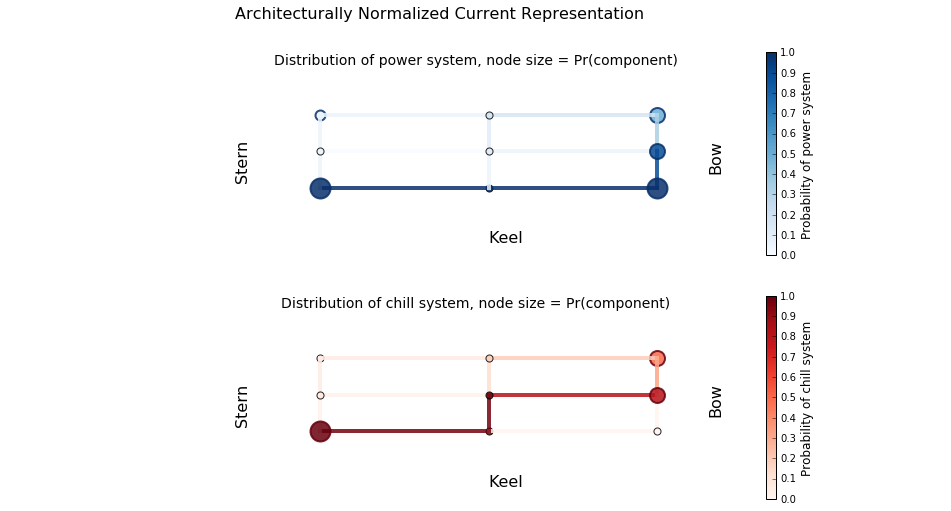

In [5]:
g, la, g_i, ir_la=basic_arch(plot=True)

#test reistance update
#Test resistance update
l=[]
d=[]
s=[]
for i in xrange(100):
    draw,locs=system_draw_i(ir_la)
    l.append(locs)
    d.append(draw)
    s.append(score_length(draw))
    
upd_la=update_resistance(ir_la,l,d,s,6.0)
iu_la=i_ANCR(g,upd_la)
# print iu_la['components']
g_iu=project_current_distribution_bus(g,iu_la,bus={})
plot_current(g_iu,iu_la,scale=.5,elev=0,angle=-90,factor=2.0)

Testing ship from van Oers (2011) p. 146

![Ship Comparison](vanOers Ship.png "Test")

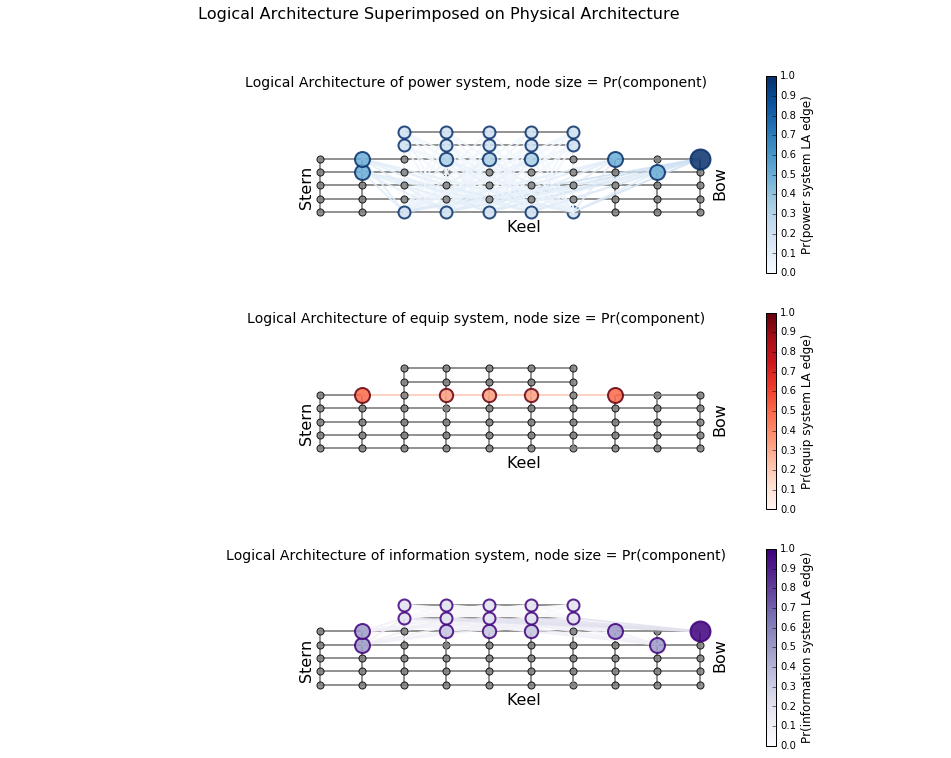

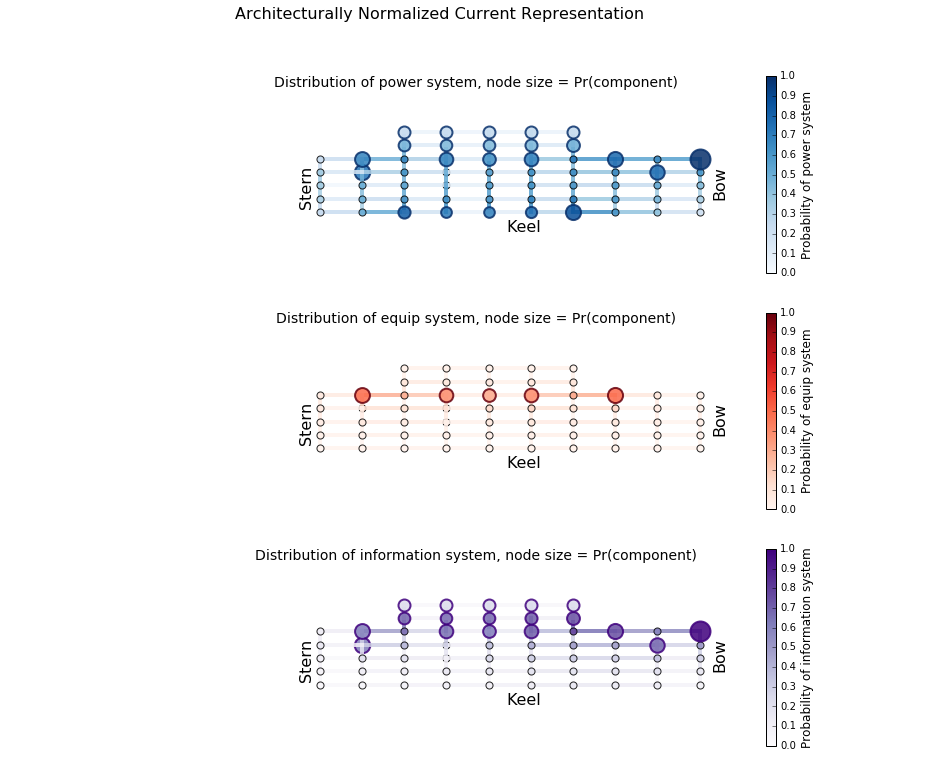

In [23]:
"""
Define Physical and logical architectures for van Oers
"""

#Physical
g=nx.grid_graph(dim=[10,1,7])
g.remove_nodes_from([(0,0,5),(0,0,6),(1,0,5),(1,0,6),(7,0,5),(7,0,6),(8,0,5),(8,0,6),(9,0,5),(9,0,6)])
# print nx.is_connected(g)

#Components and locations - first configuration
pp={(2,0,0):0.0,(3,0,0):0.0,(4,0,0):0.0,(5,0,0):1.0,(6,0,0):0.0}
VLS={(8,0,3):1.0,(1,0,3):0.0}
bridge={(2,0,5):0.0,(3,0,5):0.0,(4,0,5):0.0,(5,0,5):0.0,(6,0,5):1.0}
fdeck={(1,0,4):1.0,(2,0,4):0.0,(6,0,4):0.0,(7,0,4):0.0}
hangar={(3,0,4):1.0,(4,0,4):0.0,(5,0,4):0.0,}
radar={(2,0,6):0.0,(3,0,6):0.0,(4,0,6):0.0,(5,0,6):1.0,(6,0,6):0.0}
gun={(8,0,4):1.0,(9,0,4):0.0}

#Swtiched
s_bridge={(2,0,5):1.0,(3,0,5):0.0,(4,0,5):0.0,(5,0,5):0.0,(6,0,5):0.0}
s_fdeck={(1,0,4):0.0,(2,0,4):0.0,(6,0,4):1.0,(7,0,4):0.0}
s_VLS={(8,0,3):0.0,(1,0,3):1.0}

#Components and unknown
# u_pp={(2,0,0):'un',(3,0,0):'un',(4,0,0):'un',(5,0,0):'un',(6,0,0):'un'}
# u_VLS={(8,0,3):'un',(1,0,3):'un'}
# u_bridge={(2,0,5):'un',(3,0,5):'un',(4,0,5):'un',(5,0,5):'un',(6,0,5):'un'}
# u_fdeck={(1,0,4):'un',(2,0,4):'un',(6,0,4):'un',(7,0,4):'un'}
# u_hangar={(3,0,4):'un',(4,0,4):'un',(5,0,4):'un'}
# u_radar={(2,0,6):'un',(3,0,6):'un',(4,0,6):'un',(5,0,6):'un',(6,0,6):'un'}
# u_gun={(8,0,4):'un',(9,0,4):'un'}

u_pp={(2,0,0):'un',(3,0,0):'un',(4,0,0):'un',(5,0,0):'un',(6,0,0):'un'}
u_VLS={(8,0,3):'un',(1,0,3):'un'}
u_bridge={(2,0,5):'un',(3,0,5):'un',(4,0,5):'un',(5,0,5):'un',(6,0,5):'un'}
# u_fdeck={(1,0,4):'un',(2,0,4):'un',(6,0,4):'un',(7,0,4):'un'}
u_fdeck={(1,0,4):'un',(7,0,4):'un'}
u_hangar={(3,0,4):'un',(4,0,4):'un',(5,0,4):'un'}
u_radar={(2,0,6):'un',(3,0,6):'un',(4,0,6):'un',(5,0,6):'un',(6,0,6):'un'}
u_gun={(9,0,4):'un'}



#Logical
la={}

#Define components
la['components']={}

#Power plant
la['components']['power plant']={}
la['components']['power plant']['loc']=u_pp

#Vertical Launch System
la['components']['VLS']={}
la['components']['VLS']['loc']=u_VLS

#Bridge
la['components']['bridge']={}
la['components']['bridge']['loc']=u_bridge

#Flight Deck
la['components']['flight deck']={}
la['components']['flight deck']['loc']=u_fdeck

#Hangar
la['components']['hangar']={}
la['components']['hangar']['loc']=u_hangar

#Radar
la['components']['radar']={}
la['components']['radar']['loc']=u_radar

#Gun
la['components']['gun']={}
la['components']['gun']['loc']=u_gun



#Logical systems
la['systems']=[]

#power
la['systems'].append('power')

p=nx.DiGraph()
p.add_node('power plant',loc=la['components']['power plant']['loc'])
p.add_node('VLS',loc=la['components']['VLS']['loc'])
p.add_node('bridge',loc=la['components']['bridge']['loc'])
p.add_node('flight deck',loc=la['components']['flight deck']['loc'])
p.add_node('hangar',loc=la['components']['hangar']['loc'])
p.add_node('radar',loc=la['components']['radar']['loc'])
p.add_node('gun',loc=la['components']['gun']['loc'])

p.add_edges_from([('power plant',x) for x in p.nodes()])
p.remove_edge('power plant','power plant')

la['power']=p



#equipment
la['systems'].append('equip')
e=p.copy()
e.remove_edges_from(e.edges())
e.remove_nodes_from(['power plant','VLS','bridge','radar','gun'])
e.add_edge('hangar','flight deck')


# print e.nodes(data=True)
# print e.edges(data=True)

la['equip']=e


#information
la['systems'].append('information')
i=p.copy()
i.remove_edges_from(i.edges())
i.remove_nodes_from(['power plant'])
i.add_edges_from([('radar','bridge'),('bridge','gun'),('bridge','hangar'),('bridge','flight deck'),('bridge','VLS')])

la['information']=i

la=setup_LA(g,la)
ir_la = i_ANCR(g, la)
g_i = project_current_distribution_bus(g, ir_la)
plot_setups(g, la, scale=.5, elev=0, angle=-90, factor=2.0)
plot_current(g_i, ir_la, scale=.5, elev=0, angle=-90, factor=2.0)

In [24]:
for comp in ir_la['components']:
    print comp, ir_la['components'][comp]['i']

targets=[(2,0,0),(3,0,0),(4,0,0),(5,0,0),(6,0,0)]
for i,j in g_i.edges():
    if (i in targets) or (j in targets): 
        print (i,j), g_i[i][j]['power']

bridge {(2, 0, 5): 0.17807548597867484, (4, 0, 5): 0.16556098715561804, (3, 0, 5): 0.1599194101067932, (6, 0, 5): 0.28746829042145111, (5, 0, 5): 0.20897582633746281}
flight deck {(7, 0, 4): 0.51109629689532454, (1, 0, 4): 0.48890370310467551}
power plant {(6, 0, 0): 0.51054627082888793, (3, 0, 0): 0.078798071910152673, (5, 0, 0): 0.1207723973047431, (2, 0, 0): 0.22091777406502541, (4, 0, 0): 0.068965485891190864}
gun {(9, 0, 4): 1.0}
radar {(5, 0, 6): 0.19926350506478885, (6, 0, 6): 0.2029634383243657, (3, 0, 6): 0.19863679093284325, (4, 0, 6): 0.19729348294810056, (2, 0, 6): 0.20184278272990164}
VLS {(1, 0, 3): 0.55158483303619854, (8, 0, 3): 0.44841516696380157}
hangar {(5, 0, 4): 0.36414954578439485, (4, 0, 4): 0.27294037280916833, (3, 0, 4): 0.36291008140643688}
((1, 0, 0), (2, 0, 0)) 0.509689649421
((6, 0, 1), (6, 0, 0)) 0.613118091613
((6, 0, 0), (5, 0, 0)) 0.28210536613
((6, 0, 0), (7, 0, 0)) 0.63028896311
((4, 0, 1), (4, 0, 0)) 0.628676744351
((4, 0, 0), (3, 0, 0)) 0.063744905

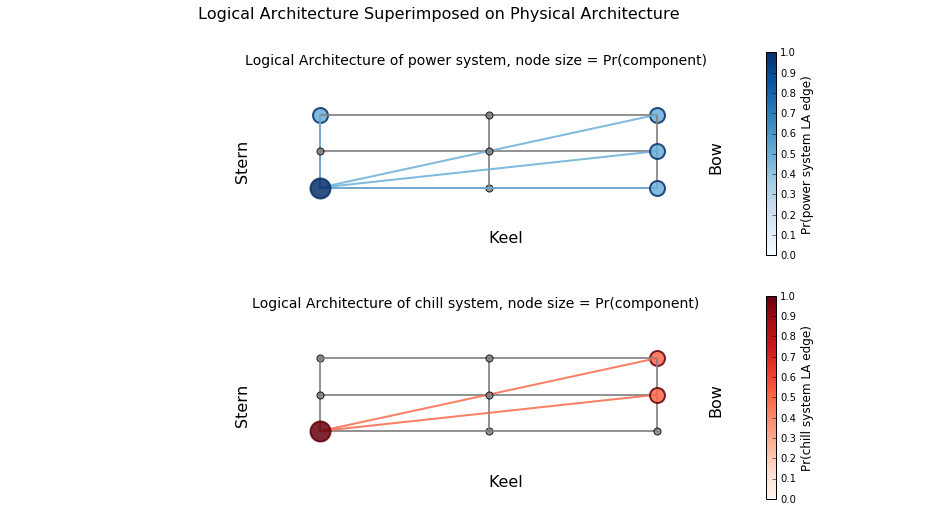

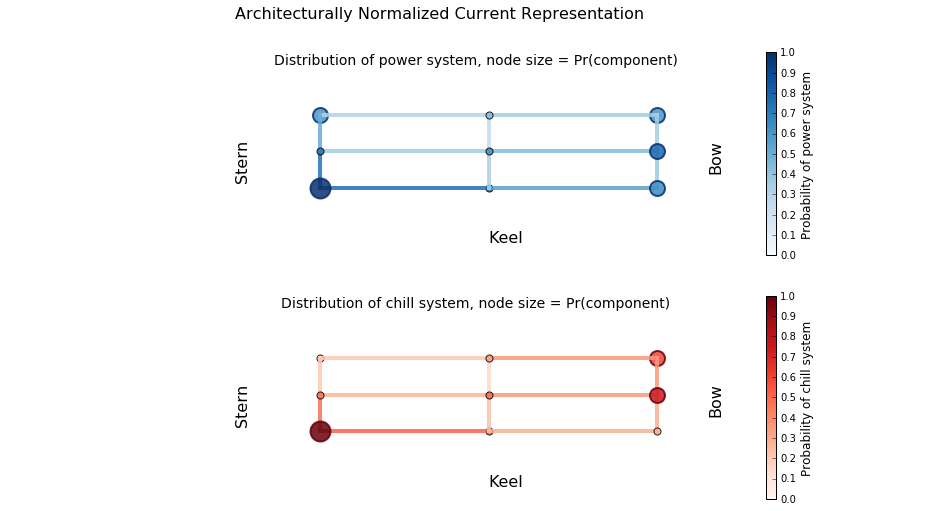

In [7]:
#Test setup_LA
# Physical Architecture
g = nx.grid_graph(dim=[3, 1, 3])

# Logical Architecture
la = {}
la['components'] = {}
la['systems'] = []

# components
c1 = {(0, 0, 0): 1.0}
la['components']['c1'] = {}
la['components']['c1']['loc'] = c1
c2 = {(2, 0, 2): .5, (2, 0, 1): .5}
la['components']['c2'] = {}
la['components']['c2']['loc'] = c2
cu = {(2, 0, 0): 'un', (0, 0, 2): 'un'}  # ,(1,0,0):'un'}
la['components']['cu'] = {}
la['components']['cu']['loc'] = cu

# systems
# power
p = nx.DiGraph()
p.add_node('c1', loc=la['components']['c1']['loc'])
p.add_node('c2', loc=la['components']['c2']['loc'])
p.add_node('cu', loc=la['components']['cu']['loc'])
p.add_edges_from([('c1', 'c2'), ('c1', 'cu')])
la['power'] = p
la['systems'].append('power')

# cooling
c = nx.DiGraph()
c.add_node('c1', loc=la['components']['c1']['loc'])
c.add_node('c2', loc=la['components']['c1']['loc'])
c.add_edges_from([('c2', 'c1')])
la['chill'] = c
la['systems'].append('chill')

la=setup_LA(g,la)
ir_la = i_ANCR(g, la)
g_i = project_current_distribution_bus(g, ir_la)
plot_setups(g, la, scale=.5, elev=0, angle=-90, factor=2.0)
plot_current(g_i, ir_la, scale=.5, elev=0, angle=-90, factor=2.0)

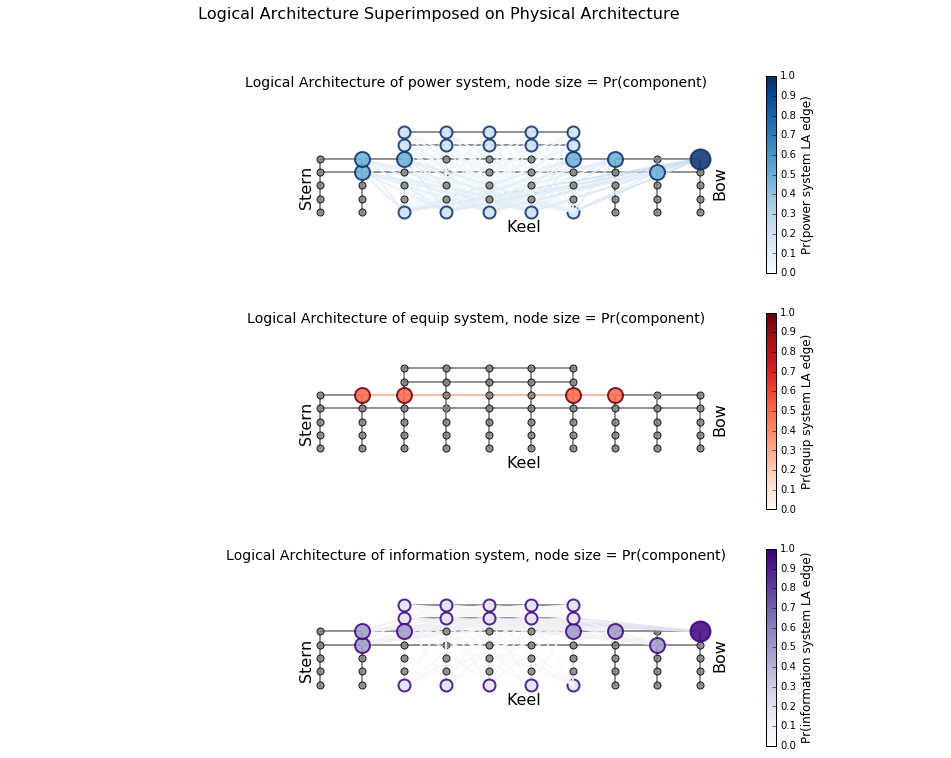

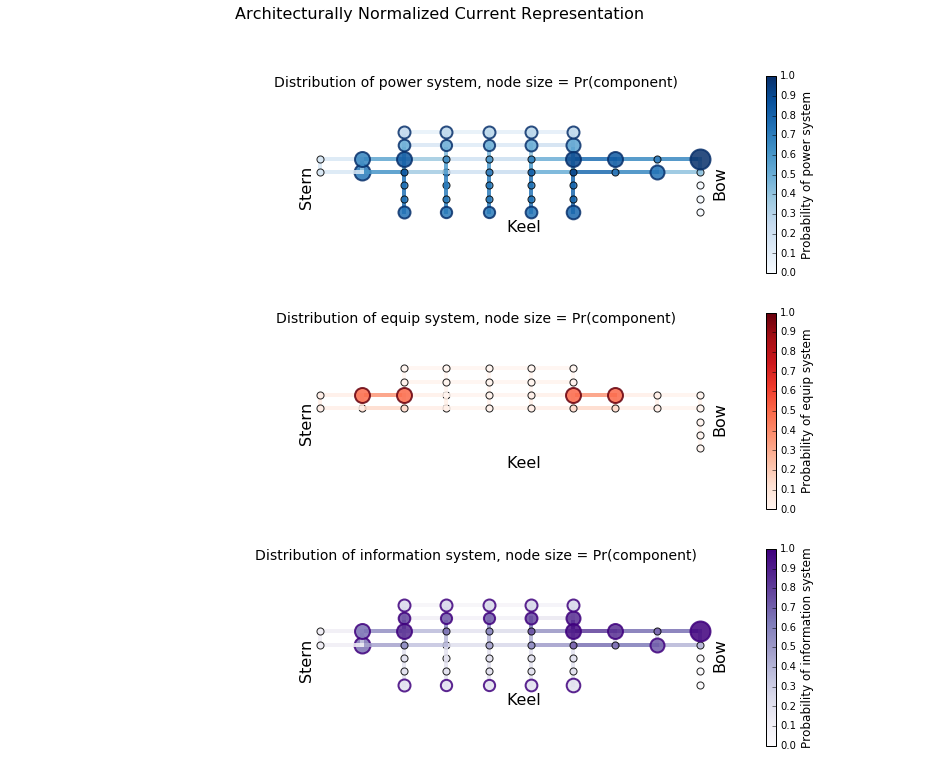

In [33]:
"""
Define Physical and logical architectures for van Oers
"""

#Physical
g=nx.grid_graph(dim=[10,1,7])
g.remove_nodes_from([(0,0,5),(0,0,6),(1,0,5),(1,0,6),(7,0,5),(7,0,6),(8,0,5),(8,0,6),(9,0,5),(9,0,6)])

#remove nodes for watertight bulkheads
bh_height=3
rem_list=[]
for i,j in g.edges():
    #check if horizontal edge
    if i[2]==j[2]:
        #check if below bh height
        if i[2]<bh_height:
            rem_list.append((i,j))

g.remove_edges_from(rem_list)
# print nx.is_connected(g)

#Components and locations - first configuration
pp={(2,0,0):0.0,(3,0,0):0.0,(4,0,0):0.0,(5,0,0):1.0,(6,0,0):0.0}
VLS={(8,0,3):1.0,(1,0,3):0.0}
bridge={(2,0,5):0.0,(3,0,5):0.0,(4,0,5):0.0,(5,0,5):0.0,(6,0,5):1.0}
fdeck={(1,0,4):1.0,(2,0,4):0.0,(6,0,4):0.0,(7,0,4):0.0}
hangar={(3,0,4):1.0,(4,0,4):0.0,(5,0,4):0.0,}
radar={(2,0,6):0.0,(3,0,6):0.0,(4,0,6):0.0,(5,0,6):1.0,(6,0,6):0.0}
gun={(8,0,4):1.0,(9,0,4):0.0}

#Swtiched
s_bridge={(2,0,5):1.0,(3,0,5):0.0,(4,0,5):0.0,(5,0,5):0.0,(6,0,5):0.0}
s_fdeck={(1,0,4):0.0,(2,0,4):0.0,(6,0,4):1.0,(7,0,4):0.0}
s_VLS={(8,0,3):0.0,(1,0,3):1.0}

#Components and unknown
# u_pp={(2,0,0):'un',(3,0,0):'un',(4,0,0):'un',(5,0,0):'un',(6,0,0):'un'}
# u_VLS={(8,0,3):'un',(1,0,3):'un'}
# u_bridge={(2,0,5):'un',(3,0,5):'un',(4,0,5):'un',(5,0,5):'un',(6,0,5):'un'}
# u_fdeck={(1,0,4):'un',(2,0,4):'un',(6,0,4):'un',(7,0,4):'un'}
# u_hangar={(3,0,4):'un',(4,0,4):'un',(5,0,4):'un'}
# u_radar={(2,0,6):'un',(3,0,6):'un',(4,0,6):'un',(5,0,6):'un',(6,0,6):'un'}
# u_gun={(8,0,4):'un',(9,0,4):'un'}

u_pp={(2,0,0):'un',(3,0,0):'un',(4,0,0):'un',(5,0,0):'un',(6,0,0):'un'}
u_VLS={(8,0,3):'un',(1,0,3):'un'}
u_bridge={(2,0,5):'un',(3,0,5):'un',(4,0,5):'un',(5,0,5):'un',(6,0,5):'un'}
# u_fdeck={(1,0,4):'un',(2,0,4):'un',(6,0,4):'un',(7,0,4):'un'}
u_fdeck={(1,0,4):'un',(7,0,4):'un'}
u_hangar={(2,0,4):'un',(6,0,4):'un'}
u_radar={(2,0,6):'un',(3,0,6):'un',(4,0,6):'un',(5,0,6):'un',(6,0,6):'un'}
u_gun={(9,0,4):'un'}



#Logical
la={}

#Define components
la['components']={}

#Power plant
la['components']['propulsion plant']={}
la['components']['propulsion plant']['loc']=u_pp

#Vertical Launch System
la['components']['VLS']={}
la['components']['VLS']['loc']=u_VLS

#Bridge
la['components']['bridge']={}
la['components']['bridge']['loc']=u_bridge

#Flight Deck
la['components']['flight deck']={}
la['components']['flight deck']['loc']=u_fdeck

#Hangar
la['components']['hangar']={}
la['components']['hangar']['loc']=u_hangar

#Radar
la['components']['radar mast']={}
la['components']['radar mast']['loc']=u_radar

#Gun
la['components']['fwd. gun']={}
la['components']['fwd. gun']['loc']=u_gun



#Logical systems
la['systems']=[]

#power
la['systems'].append('power')

p=nx.DiGraph()
p.add_node('propulsion plant',loc=la['components']['propulsion plant']['loc'])
p.add_node('VLS',loc=la['components']['VLS']['loc'])
p.add_node('bridge',loc=la['components']['bridge']['loc'])
p.add_node('flight deck',loc=la['components']['flight deck']['loc'])
p.add_node('hangar',loc=la['components']['hangar']['loc'])
p.add_node('radar mast',loc=la['components']['radar mast']['loc'])
p.add_node('fwd. gun',loc=la['components']['fwd. gun']['loc'])

p.add_edges_from([('propulsion plant',x) for x in p.nodes()])
p.remove_edge('propulsion plant','propulsion plant')

la['power']=p



#equipment
la['systems'].append('equip')
e=p.copy()
e.remove_edges_from(e.edges())
e.remove_nodes_from(['propulsion plant','VLS','bridge','radar mast','fwd. gun'])
e.add_edge('hangar','flight deck')


# print e.nodes(data=True)
# print e.edges(data=True)

la['equip']=e


#information
la['systems'].append('information')
i=p.copy()
i.remove_edges_from(i.edges())
# i.remove_nodes_from(['propulsion plant'])
i.add_edges_from([('radar mast','bridge'),('bridge','fwd. gun'),
                  ('bridge','hangar'),('bridge','flight deck'),
                  ('bridge','VLS'),('bridge','propulsion plant')])

la['information']=i

#image
# la['systems'].append('image')
# image=nx.DiGraph()
# la['image']=image

la=setup_LA(g,la)
ir_la = i_ANCR(g, la)
g_i = project_current_distribution_bus(g, ir_la)
plot_setups(g, la, scale=.5, elev=0, angle=-90, factor=2.0)
plot_current(g_i, ir_la, scale=.5, elev=0, angle=-90, factor=2.0)

In [17]:
i_la = i_arrange_g(g, la)
for c in i_la['components']:
    print c, i_la['components'][c]['i']


bridge {(2, 0, 5): 0.16705352306231366, (4, 0, 5): 0.11904686469595167, (3, 0, 5): 0.11696539971010521, (6, 0, 5): 0.40423724388389809, (5, 0, 5): 0.19269696864773142}
flight deck {(7, 0, 4): 0.50073523710563672, (1, 0, 4): 0.49926476289436339}
propulsion plant {(6, 0, 0): 0.36242806769205982, (3, 0, 0): 0.13171322581128225, (5, 0, 0): 0.17654358398727599, (2, 0, 0): 0.20256177385587179, (4, 0, 0): 0.12675334865351015}
fwd. gun {(9, 0, 4): 1.0}
radar mast {(5, 0, 6): 0.19968795805497999, (6, 0, 6): 0.20070441091141936, (3, 0, 6): 0.19968065641915692, (4, 0, 6): 0.19923690866207694, (2, 0, 6): 0.20069006595236671}
VLS {(1, 0, 3): 0.59814610176838834, (8, 0, 3): 0.40185389823161166}
hangar {(2, 0, 4): 0.49993390511586261, (6, 0, 4): 0.50006609488413756}


In [8]:
sys_edges=i_la['power'].edges()
print sys_edges



[('propulsion plant', 'bridge'), ('propulsion plant', 'flight deck'), ('propulsion plant', 'fwd. gun'), ('propulsion plant', 'radar mast'), ('propulsion plant', 'VLS'), ('propulsion plant', 'hangar')]


In [30]:
sys_edges=0
E_list=i_la['equip'].edges()

#Get set of possible location pairs
loc_pairs=set()

#iterate through each component locations to get the possible location pairs
for u,v in E_list:
    u_locs=i_la['components'][u]['loc'].keys()
    v_locs=i_la['components'][v]['loc'].keys()
    pairs=list(itertools.product(*[u_locs,v_locs]))
    loc_pairs.update(pairs)
    
print loc_pairs

#get current distributions for each location pair
current_pairs={}
for (x,y) in loc_pairs:
    I=current_st(g,x,y)
    current_pairs[(x,y)]=I
    
# print current_pairs

#get all possible arrangments and their probability
#identify components
components=set(itertools.chain.from_iterable(E_list))
print components

#map each component to an index  
index_to_component_map=dict(zip(xrange(len(components)),components))
component_to_index_map=dict((y,x) for x,y in index_to_component_map.iteritems())
print index_to_component_map


#use indexes to generate list of lists for component locations
possible_locations=[]
for index in xrange(len(components)):
    c=index_to_component_map[index]
    possible_locations.append(i_la['components'][c]['loc'].keys())
print possible_locations

#get possible combinations of locations
arrangement_list=list(itertools.product(*possible_locations))
print arrangement_list

#initalize results dictionary
p=dict.fromkeys(g.nodes()+g.edges(),0.0)

#iterate through arrangements to populate results
for n in g.nodes():
    #nodes first
    #iterate through arrangements
    for a in arrangement_list:
        p_arrange=1.0 #get probability of the arrangement a
        for a_index in xrange(len(a)):
            loc_at_index=a[a_index] #location at the index
            c_at_index=index_to_component_map[a_index] #component at the index
            p_arrange*=i_la['components'][c_at_index]['i'][loc_at_index]
        #print a, p_arrange
        
        #get probability that the element is not used by any logical connection in E
        p_ele_not_used_a=1.0
        for u,v in E_list:
            #get the arrangement's component assignment
            u_index=component_to_index_map[u] #get index in arrangement
            v_index=component_to_index_map[v] #get index in arrangement
            u_loc=a[u_index] #location of u in arrangement
            v_loc=a[v_index] #location of v in arrangement
            
            #get current value for node n
            #first get right key
            if (u_loc,v_loc) in current_pairs:
                key=(u_loc,v_loc)
            else:
                key=(v_loc,u_loc)
            p_ele_not_used_a*=(1.0-current_pairs[key][n]) #assemble probability that node is not used
        
        #get probability the element was used by any logical connection in E
        p_ele_used_a=1.0-p_ele_not_used_a
        
        #weight use by the probability of the arrangement
        p_ele_used=p_ele_used_a*p_arrange
        
        #add probability of use to the results dictionary
        p[n]+=p_ele_used

        
        
# for c in i_la['components']:
#     for loc in i_la['components']['i']:keys()


set([((2, 0, 4), (7, 0, 4)), ((6, 0, 4), (1, 0, 4)), ((6, 0, 4), (7, 0, 4)), ((2, 0, 4), (1, 0, 4))])
set(['flight deck', 'hangar'])
{0: 'flight deck', 1: 'hangar'}
[[(7, 0, 4), (1, 0, 4)], [(2, 0, 4), (6, 0, 4)]]
[((7, 0, 4), (2, 0, 4)), ((7, 0, 4), (6, 0, 4)), ((1, 0, 4), (2, 0, 4)), ((1, 0, 4), (6, 0, 4))]
{((2, 0, 5), (2, 0, 6)): 0.0, (3, 0, 3): 0.18527301966810156, ((1, 0, 3), (2, 0, 3)): 0.0, (8, 0, 4): 0.048314360634404252, ((8, 0, 4), (9, 0, 4)): 0.0, (6, 0, 0): 0.0, (3, 0, 5): 0.14212636042400936, (2, 0, 5): 0.15806475175954032, (8, 0, 2): 0.0, (6, 0, 2): 0.0, ((0, 0, 4), (0, 0, 3)): 0.0, ((4, 0, 3), (4, 0, 4)): 0.0, ((3, 0, 5), (4, 0, 5)): 0.0, (8, 0, 0): 0.0, (6, 0, 4): 0.66445455151705013, ((2, 0, 4), (2, 0, 3)): 0.0, ((3, 0, 3), (2, 0, 3)): 0.0, (5, 0, 6): 0.087625757155767953, (2, 0, 1): 0.0, ((3, 0, 4), (4, 0, 4)): 0.0, ((7, 0, 1), (7, 0, 2)): 0.0, (6, 0, 6): 0.061360186503819983, ((3, 0, 5), (3, 0, 6)): 0.0, ((1, 0, 0), (1, 0, 1)): 0.0, (5, 0, 4): 0.22414972704070507, (

In [32]:
for n in g.nodes():
    print n, p[n]

(3, 0, 3) 0.185273019668
(8, 0, 4) 0.0483143606344
(6, 0, 0) 0.0
(3, 0, 5) 0.142126360424
(2, 0, 5) 0.15806475176
(8, 0, 2) 0.0
(6, 0, 2) 0.0
(8, 0, 0) 0.0
(6, 0, 4) 0.664454551517
(5, 0, 6) 0.0876257571558
(2, 0, 1) 0.0
(6, 0, 6) 0.0613601865038
(5, 0, 4) 0.224149727041
(2, 0, 3) 0.22902568173
(5, 0, 2) 0.0
(5, 0, 0) 0.0
(1, 0, 3) 0.179882068963
(1, 0, 1) 0.0
(4, 0, 2) 0.0
(4, 0, 0) 0.0
(4, 0, 6) 0.0890262608206
(0, 0, 3) 0.0449705172408
(4, 0, 4) 0.170083043447
(0, 0, 1) 0.0
(7, 0, 1) 0.0
(9, 0, 3) 0.0120785901586
(7, 0, 3) 0.181178852379
(9, 0, 1) 6.66133728452e-16
(3, 0, 0) 0.0
(3, 0, 2) 0.0
(6, 0, 1) 0.0
(3, 0, 4) 0.224060081093
(8, 0, 3) 0.0483143606344
(6, 0, 3) 0.230122357362
(3, 0, 6) 0.0876252952316
(2, 0, 4) 0.664022898741
(8, 0, 1) 0.0
(6, 0, 5) 0.158053631034
(2, 0, 6) 0.0613633324986
(2, 0, 0) 0.0
(5, 0, 5) 0.142147076404
(2, 0, 2) 0.0
(5, 0, 3) 0.185582655426
(5, 0, 1) 0.0
(1, 0, 2) 0.0
(1, 0, 0) 0.0
(4, 0, 3) 0.172274630952
(4, 0, 1) 0.0
(1, 0, 4) 0.517135167537
(7, 0, 

In [21]:
print xrange(len(components))

xrange(7)


In [28]:
print index_map
rev_map = dict((y,x) for x,y in index_map.iteritems())
print rev_map

{0: 'flight deck', 1: 'hangar'}
{'flight deck': 0, 'hangar': 1}
